In [53]:
from src.FunctionsProperties import *
import matplotlib.pyplot as plt

## Create all_files

In [2]:
# Create folders to Results
make_results_folders()
move_to_data()

In [3]:
# ==> READ DOCUMENTATION OF FUNCTION all_properties_file(N,dim, alpha_a, alpha_g) BEFORE RUN THAT CELL!! <==
N = [5000, 10000, 20000, 40000, 80000, 100000, 160000, 320000, 640000]
#N = [5000]
dim = [1, 2, 3, 4]

for n in N:
    for d in dim:
        all_combinations_ag =  extract_alpha_values(n, d)
        for i in range(len(all_combinations_ag)):
            try:
                # READ DOCUMENTATION BEFORE RUN THAT CELL
                all_properties_file(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
                fixing_data(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
            except FileNotFoundError:
                pass
            #remove_cod_file_column(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
clear_output()

In [4]:
N = [5000, 10000, 20000, 40000, 80000, 100000 ,160000, 320000]
dim = [1, 2, 3, 4]
format_file(N, dim)
all_data(N, dim)

5000 1 8.0 3.0
5000 1 4.0 4.0
5000 1 1.0 9.0
5000 1 2.0 14.0
5000 1 0.0 2.0
5000 1 9.0 3.0
5000 1 36.0 2.0
5000 1 16.0 2.0
5000 1 6.0 8.0
5000 1 5.0 0.0
5000 1 8.0 7.0
5000 1 6.0 6.0
5000 1 0.0 3.0
5000 1 4.0 7.0
5000 1 1.0 4.0
5000 1 7.0 8.0
5000 1 1.0 2.0
5000 1 11.0 2.0
5000 1 2.0 0.1
5000 1 7.0 4.0
5000 1 4.0 8.0
5000 1 6.0 2.0
5000 1 9.0 7.0
5000 1 4.0 9.0
5000 1 2.0 3.0
5000 1 1.0 8.0
5000 1 8.0 5.0
5000 1 5.0 2.0
5000 1 1.5 2.0
5000 1 8.0 2.0
5000 1 14.0 2.0
5000 1 9.0 9.0
5000 1 8.0 0.0
5000 1 8.0 0.1
5000 1 4.0 3.0
5000 1 3.0 1.0
5000 1 8.0 4.0
5000 1 7.0 9.0
5000 1 9.0 0.1
5000 1 21.0 2.0
5000 1 8.0 1.0
5000 1 4.0 2.0
5000 1 8.0 8.0
5000 1 9.0 4.0
5000 1 0.0 5.0
5000 1 4.0 0.1
5000 1 5.0 0.1
5000 1 9.0 5.0
5000 1 7.0 0.0
5000 1 0.0 0.1
5000 1 6.5 2.0
5000 1 4.0 6.0
5000 1 8.0 6.0
5000 1 15.0 2.0
5000 1 7.5 2.0
5000 1 10.0 2.0
5000 1 2.0 4.0
5000 1 2.0 11.0
5000 1 1.0 1.0
5000 1 9.0 1.0
5000 1 9.0 2.0
5000 1 3.0 8.0
5000 1 2.0 6.0
5000 1 8.0 9.0
5000 1 2.0 7.0
5000 1 0.0 0.0
5

# <b> Statistical Analysis </b>

### For some reason, for some sets of parameters ($N$, $dim$, $\alpha_a$, $\alpha_g$) , the values ​​of the assortativity coefficients have a large fluctuation (large STD values), generating averages with a considerably large standard error. With this in mind, it is necessary to perform an analysis and filtering on the data whose sets present these problems.

## <b> Using an absolute approach </b>

### Set absolute bounds for the standard error and standard deviation ($\sigma$), regardless of the measurement, and filter out data that exceed these bounds. In my case, i'll use std for other combinations ($\alpha_g$, $\alpha_a$) where the standard error are smaller 10%, when $N$ and $dim$ are equals. The process is very simple. Given the set $R$ $=$ $[-0.0245503$, $-0.0155637$, $-0.0219698$, $-0.0144903$ $,...]$ and a good value for $\sigma$, $\sigma$ $=$ $\sigma_{ideal}$. Each value outside of range $-\sigma_{ideal}$ $<$ $value$ $<$ $\sigma_{ideal}$ or $value < |\sigma_{ideal}|$ is refused.

In [7]:
# Import dataframe with all data
df = pd.read_csv("../../data/all_data.txt", delimiter=" ")
# Filter all data for alpha_a > 1.0
df = df[df["alpha_g"]>=1.0]
# Save new dataframe
df.to_csv("../../data/all_data.txt", index=False, sep=' ')
df.head()

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
0,5000,1,8.0,3.0,51,15.264582,0.141807,1.012706,36.254902,0.510166,3.643312,0.040476,0.001568,0.011196
1,5000,1,4.0,4.0,51,14.834792,0.175089,1.250386,35.686275,0.561853,4.012432,0.015934,0.001676,0.011971
2,5000,1,1.0,9.0,51,11.606915,0.150811,1.077005,28.274510,0.293830,2.098365,-0.095851,0.003681,0.026290
3,5000,1,2.0,14.0,29720,14.733576,0.009513,1.640035,34.698822,0.023322,4.020645,-0.039872,0.000094,0.016262
4,5000,1,0.0,2.0,20986,8.588004,0.003548,0.514053,22.601782,0.012392,1.795171,-0.075748,0.000110,0.015866


In [8]:
# Filter N to future linear regression Propetie = Xi_Propertie(dim, alpha_a, alpha_g) * log_10(N) + Chi_Propertie(dim, alpha_a, alpha_g)
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter = [0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
dimensions = [1, 2, 3, 4]

# Filtered dataframe with these sets
f_df = df[
    (df['N'].isin(N)) &
    (df['alpha_a'].isin(alpha_filter)) &
    (df['dim'].isin(dimensions)) &
    (df['alpha_g'] == 2.0)
].sort_values(by=["alpha_a"]).reset_index(drop=True)
f_df

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
0,5000,1,0.0,2.0,20986,8.588004,0.003548,0.514053,22.601782,0.012392,1.795171,-0.075748,0.000110,0.015866
1,5000,4,0.0,2.0,1052,8.593929,0.016083,0.521638,22.682510,0.056902,1.845600,-0.075923,0.000492,0.015973
2,160000,1,0.0,2.0,12,12.124283,0.154200,0.534164,34.250000,0.509382,1.764550,-0.024083,0.002092,0.007248
3,10000,1,0.0,2.0,1271,9.281426,0.013933,0.496730,24.777341,0.050863,1.813334,-0.060303,0.000376,0.013393
4,80000,4,0.0,2.0,100,11.417981,0.049831,0.498313,31.820000,0.159152,1.591518,-0.030602,0.000759,0.007593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,10000,2,15.0,2.0,51,15.841447,0.100122,0.715014,37.901961,0.423112,3.021621,0.027051,0.001207,0.008617
416,5000,3,15.0,2.0,101,13.550015,0.078821,0.792137,32.128713,0.267613,2.689473,0.007534,0.001351,0.013582
417,5000,4,15.0,2.0,101,13.078857,0.080510,0.809114,30.841584,0.266526,2.678554,0.003922,0.001355,0.013615
418,320000,3,15.0,2.0,6,21.485800,0.236945,0.580395,54.000000,0.816497,2.000000,0.019385,0.000599,0.001467


In [9]:
# Starting with empty dictionary
data_percent = {"N": [], "dim": [], "alpha_a": [], "alpha_g": [], "N_samples":[] ,"per_short": 
                [],"std_short":[] ,"per_ass": [],"std_ass":[] ,"per_dia": [], "std_dia":[]}

# Iterate through the rows of the DataFrame
for _, row in f_df.iterrows():
    data_percent["N"].append(row["N"])
    data_percent["dim"].append(row["dim"])
    data_percent["alpha_a"].append(row["alpha_a"])
    data_percent["alpha_g"].append(row["alpha_g"])
    data_percent["N_samples"].append(row["N_samples"])
    
    data_percent["std_short"].append(row["short_std"])
    data_percent["std_ass"].append(row["ass_coeff_std"])
    data_percent["std_dia"].append(row["diameter_std"])
    
    # calculating percentages of each standard error
    per_short = (row["short_err"] / row["short_mean"]) * 100 if row["short_mean"] != 0 else 0
    per_ass = (row["ass_coeff_err"] / abs(row["ass_coeff_mean"])) * 100 if row["ass_coeff_mean"] != 0 else 0
    per_dia = (row["diameter_err"] / row["diameter_mean"]) * 100 if row["diameter_mean"] != 0 else 0
    
    data_percent["per_short"].append(per_short)
    data_percent["per_ass"].append(per_ass)
    data_percent["per_dia"].append(per_dia)

# New dataframe with all percentages to each properties
df_per = pd.DataFrame(data=data_percent)
df_per.to_csv("percent_err.txt", index=False, sep=' ')
df_per.head()

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,5000.0,1.0,0.0,2.0,20986.0,0.041319,0.514053,0.144586,0.015866,0.054827,1.795171
1,5000.0,4.0,0.0,2.0,1052.0,0.187141,0.521638,0.648649,0.015973,0.250864,1.845600
2,160000.0,1.0,0.0,2.0,12.0,1.271827,0.534164,8.688450,0.007248,1.487246,1.764550
3,10000.0,1.0,0.0,2.0,1271.0,0.150118,0.496730,0.622950,0.013393,0.205282,1.813334
4,80000.0,4.0,0.0,2.0,100.0,0.436429,0.498313,2.481037,0.007593,0.500163,1.591518


In [10]:
# Filtering just percentages with values greater than 10
filtered_df = df_per[
    (df_per['per_short'] >= 10) | 
    (df_per['per_ass'] >= 10) | 
    (df_per['per_dia'] >= 10)
].reset_index(drop=True)

In [11]:
filtered_df.head()

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,2.0,0.0,2.0,6.0,2.172036,0.673701,12.974293,0.004913,2.250765,1.966384
1,320000.0,1.0,0.0,2.0,6.0,1.685318,0.520119,11.515196,0.004260,2.623088,2.345208
2,320000.0,4.0,0.0,2.0,6.0,1.281625,0.399933,12.069082,0.005295,0.917431,0.816497
3,160000.0,4.0,1.0,2.0,12.0,1.872601,0.751579,11.744720,0.010087,1.443839,1.621354
4,320000.0,3.0,1.0,2.0,6.0,1.394497,0.422309,18.571843,0.010898,2.480806,2.136976


In [12]:
# Just assortativity with % standard error >= 10%
filtered_df[filtered_df["per_short"]>=10],filtered_df[filtered_df["per_dia"]>=10], filtered_df[filtered_df["per_ass"]>=10]

(Empty DataFrame
 Columns: [N, dim, alpha_a, alpha_g, N_samples, per_short, std_short, per_ass, std_ass, per_dia, std_dia]
 Index: [],
            N  dim  alpha_a  alpha_g  N_samples  per_short  std_short  \
 35  320000.0  1.0      9.0      2.0        6.0   3.497054   1.984332   
 70  320000.0  1.0     13.0      2.0        6.0   4.124763   2.430834   
 
      per_ass   std_ass    per_dia    std_dia  
 35  0.553896  0.000762  14.120903  21.848722  
 70  0.783426  0.001198  16.348630  26.964174  ,
            N  dim  alpha_a  alpha_g  N_samples  per_short  std_short  \
 0   320000.0  2.0      0.0      2.0        6.0   2.172036   0.673701   
 1   320000.0  1.0      0.0      2.0        6.0   1.685318   0.520119   
 2   320000.0  4.0      0.0      2.0        6.0   1.281625   0.399933   
 3   160000.0  4.0      1.0      2.0       12.0   1.872601   0.751579   
 4   320000.0  3.0      1.0      2.0        6.0   1.394497   0.422309   
 ..       ...  ...      ...      ...        ...        ...   

In [13]:
# Filtering the general dataframe (df), with parameters other than those whose error is greater than 10%
N_filt = [i for i in filtered_df["N"]]
dim_filt = [i for i in filtered_df["dim"]]
alpha_a_filt = [i for i in filtered_df["alpha_a"]]
alpha_g_filt = [i for i in filtered_df["alpha_g"]]
N_samples_filt = [i for i in filtered_df["N_samples"]]

comb = {"N":N_filt, "dim": dim_filt, "alpha_a":alpha_a_filt, "alpha_g":alpha_g_filt, "N_samples":N_samples_filt}
df_remover = pd.DataFrame(comb)

df_non_10 = df.merge(df_remover, on=['N', 'dim', 'alpha_a', 'alpha_g', "N_samples"], how='left', indicator=True)
df_non_10 = df_non_10[df_non_10['_merge'] == 'left_only'].drop(columns=['_merge'])

In [14]:
# Dataframe with % error in assortativity greater 10%
filtered_df

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,2.0,0.0,2.0,6.0,2.172036,0.673701,12.974293,0.004913,2.250765,1.966384
1,320000.0,1.0,0.0,2.0,6.0,1.685318,0.520119,11.515196,0.004260,2.623088,2.345208
2,320000.0,4.0,0.0,2.0,6.0,1.281625,0.399933,12.069082,0.005295,0.917431,0.816497
3,160000.0,4.0,1.0,2.0,12.0,1.872601,0.751579,11.744720,0.010087,1.443839,1.621354
4,320000.0,3.0,1.0,2.0,6.0,1.394497,0.422309,18.571843,0.010898,2.480806,2.136976
...,...,...,...,...,...,...,...,...,...,...,...
80,10000.0,4.0,14.0,2.0,51.0,0.702636,0.708174,22.767787,0.009675,0.968682,2.333053
81,10000.0,4.0,15.0,2.0,51.0,0.652443,0.654341,29.312199,0.013299,0.955789,2.319398
82,10000.0,3.0,15.0,2.0,51.0,0.604741,0.647900,19.773953,0.012639,1.057979,2.648862
83,5000.0,3.0,15.0,2.0,101.0,0.581701,0.792137,17.939215,0.013582,0.832939,2.689473


In [15]:
# Dataframe with % error in assortativity less than 10%
df_non_10

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
0,5000,1,8.0,3.0,51,15.264582,0.141807,1.012706,36.254902,0.510166,3.643312,0.040476,0.001568,0.011196
1,5000,1,4.0,4.0,51,14.834792,0.175089,1.250386,35.686275,0.561853,4.012432,0.015934,0.001676,0.011971
2,5000,1,1.0,9.0,51,11.606915,0.150811,1.077005,28.274510,0.293830,2.098365,-0.095851,0.003681,0.026290
3,5000,1,2.0,14.0,29720,14.733576,0.009513,1.640035,34.698822,0.023322,4.020645,-0.039872,0.000094,0.016262
4,5000,1,0.0,2.0,20986,8.588004,0.003548,0.514053,22.601782,0.012392,1.795171,-0.075748,0.000110,0.015866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,320000,4,2.0,10.0,6,12.795600,0.290726,0.712132,36.166667,0.600925,1.471960,-0.021508,0.003077,0.007536
2428,320000,4,2.0,9.0,6,12.572267,0.296653,0.726648,37.166667,1.194897,2.926887,-0.017147,0.002709,0.006635
2429,320000,4,2.0,8.0,6,12.348833,0.206710,0.506335,35.666667,0.614636,1.505545,-0.018226,0.001209,0.002961
2432,320000,4,2.0,1.0,6,23.351350,0.974458,2.386924,55.000000,1.032796,2.529822,-0.068284,0.015288,0.037447


In [47]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
# get σ_ideal
mean_std_N_for_dim = {"N":[], "dim":[], "ass_coeff_std_mean":[]}
for n in N:
    for dim in dimensions:
        df_N_dim = df_non_10[(df_non_10["N"]==n) & (df_non_10["dim"]==dim) & (df_non_10["alpha_g"]==2.0)]
        
        mean_std_N_for_dim["N"].append(n)
        mean_std_N_for_dim["dim"].append(dim)
        mean_std_N_for_dim["ass_coeff_std_mean"].append(df_N_dim["ass_coeff_std"].mean())

# list of mean σ to set with σ_ideal smallest 10% for each combinations (N, dim)
df_std_N_dim = pd.DataFrame(data=mean_std_N_for_dim)

In [48]:
# set with σ_ideal for each (N, dim)
df_std_N_dim

,N,dim,ass_coeff_std_mean
0,5000,1,0.012570
1,5000,2,0.014888
2,5000,3,0.016026
3,5000,4,0.016970
4,10000,1,0.009178
5,10000,2,0.011180
6,10000,3,0.012599
7,10000,4,0.013524
8,20000,1,0.006950
9,20000,2,0.008486


In [ ]:
# open files with greater error 10% to clean data from relative σ, base with good for each combinations (N, dim) std in df_std_N_dim
par_fil = filtered_df[["N", "dim", "alpha_a", "alpha_g"]]

R = [0.03, -0.0343, 0.012, -0.045, 0.02, 0.001, -0.03, 0.015]

for i in range(len(par_fil)):
    
    # List to allocate values of R for each set of samples
    aux_lst_R = []
    
    # open file with combination parameters with error bigger 10%
    n, dim, alpha_a, alpha_g = int(par_fil["N"][i]), int(par_fil["dim"][i]), float(par_fil["alpha_a"][i]), float(par_fil["alpha_g"][i])
    # path file
    path_file = f"../../data/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
    # select the best std (σ_ideal) for that N and dim
    std_ideal = df_std_N_dim[(df_std_N_dim["N"]==n) & (df_std_N_dim["dim"]==dim)]["ass_coeff_std_mean"].values[0]
    filtered_R = [value for value in R if abs(value) <= std_ideal]
print(filtered_R)

0.004567087287489573
0.0022483775413078594
0.007111233112188173
0.0075863787742235945
0.005578888158354062
0.007111233112188173
0.004567087287489573
0.005578888158354062
0.007111233112188173
0.007111233112188173
0.004567087287489573
0.006516577183851871
0.004567087287489573
0.007711509915152745
0.006447211814474723
0.008282658778267452
0.005578888158354062
0.009608334642779864
0.008282658778267452
0.007111233112188173
0.005578888158354062
0.0075863787742235945
0.015643795096095963
0.005578888158354062
0.007601699758595786
0.0075863787742235945
0.008282658778267452
0.015643795096095963
0.008681421783856152
0.007111233112188173
0.007111233112188173
0.008681421783856152
0.010713988714332101
0.008282658778267452
0.0075863787742235945
0.0022483775413078594
0.007601699758595786
0.005578888158354062
0.008046919612739093
0.011379753525595702
0.008046919612739093
0.013204811984059716
0.013839309854279006
0.010713988714332101
0.0075863787742235945
0.008681421783856152
0.00925887415798755
0.01564

Outliers encontrados:
Empty DataFrame
Columns: [#short_path, #diameter, #ass_coeff]
Index: []


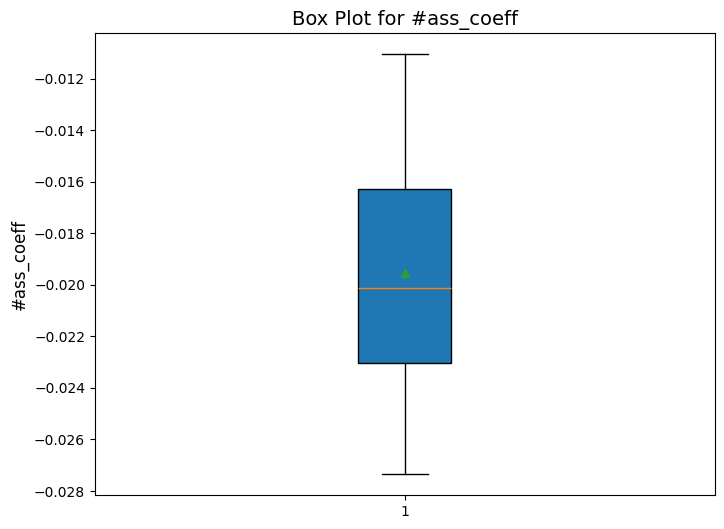

In [57]:
# Finding outliers

# Dados
data = {
    "#short_path": [14.1955, 12.9964, 12.9335, 11.9786, 12.7769, 12.3533, 12.6944, 12.7720, 13.2498, 13.3745, 12.9573, 13.7661],
    "#diameter": [41, 37, 34, 32, 36, 36, 37, 37, 35, 38, 35, 39],
    "#ass_coeff": [-0.027352, -0.016878, -0.021106, -0.011056, -0.019856, -0.020398, -0.014076, -0.019836, -0.023043, -0.023627, -0.014473, -0.023022]
}

# Criar um DataFrame
df = pd.DataFrame(data)

# Coluna que estamos analisando
column = "#ass_coeff"

# Calcular Q1, Q3 e IQR
q1 = np.percentile(df[column], 25)
q3 = np.percentile(df[column], 75)
iqr = q3 - q1

# Limites para outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identificar outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Exibir outliers
print("Outliers encontrados:")
print(outliers)

# Plotar o box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df[column], vert=True, patch_artist=True, showmeans=True)
plt.title(f"Box Plot for {column}", fontsize=14)
plt.ylabel(column, fontsize=12)
plt.show()


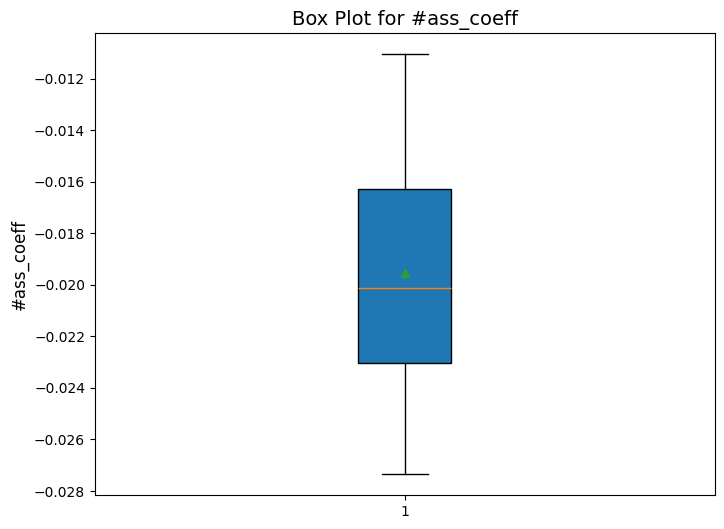

In [55]:
# box_plot
n=320000
dim = 1
alpha_a, alpha_g = 0.0, 2.0
path_file = f"../../data/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
a = pd.read_csv(path_file, sep=',')

plt.figure(figsize=(8, 6))
plt.boxplot(a["#ass_coeff"], vert=True, patch_artist=True, showmeans=True)
plt.title("Box Plot for #ass_coeff", fontsize=14)
plt.ylabel("#ass_coeff", fontsize=12)
plt.show()

In [43]:
filtered_df[filtered_df["N"]==320000]

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,2.0,0.0,2.0,6.0,2.172036,0.673701,12.974293,0.004913,2.250765,1.966384
1,320000.0,1.0,0.0,2.0,6.0,1.685318,0.520119,11.515196,0.004260,2.623088,2.345208
2,320000.0,4.0,0.0,2.0,6.0,1.281625,0.399933,12.069082,0.005295,0.917431,0.816497
4,320000.0,3.0,1.0,2.0,6.0,1.394497,0.422309,18.571843,0.010898,2.480806,2.136976
5,320000.0,4.0,1.0,2.0,7.0,2.649098,0.876365,11.729552,0.007690,1.226633,1.112697
6,320000.0,2.0,1.0,2.0,6.0,1.029292,0.314998,11.208325,0.007287,1.141383,0.983192
7,320000.0,3.0,3.0,2.0,6.0,2.898996,0.991332,11.709476,0.012943,2.644351,2.428992
8,320000.0,4.0,3.0,2.0,6.0,2.506059,0.740859,17.258784,0.012568,2.841446,2.366432
9,320000.0,4.0,4.0,2.0,6.0,3.635265,1.276814,10.835720,0.010364,3.388260,3.250641
10,320000.0,2.0,4.0,2.0,6.0,1.943922,0.910814,18.400005,0.003853,1.961345,2.338090
